## Credit Scoring Business Understanding


#### Tadele Bizuye

###  Step 1: Load the Data

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
# Load data
df = pd.read_csv("C:/Users/TadeleBizuye/OneDrive - esxethiopia/Desktop/AI/data.csv")

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Step 2: Basic Statistics

In [57]:
df.describe(include='all')

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,NaN,2.255974,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233068e+05,1.231221e+05,NaN,0.732924,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,NaN,2.000000,0.000000


### Step 3: Check for Missing Values

In [58]:
missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

### Step 4: Understand Categorical Columns

In [59]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"Value counts for {col}")
    print(df[col].value_counts())
    print("-"*50)

Value counts for TransactionId
TransactionId
TransactionId_76871     1
TransactionId_74922     1
TransactionId_2737      1
TransactionId_28101     1
TransactionId_33267     1
                       ..
TransactionId_32860     1
TransactionId_139405    1
TransactionId_65784     1
TransactionId_8889      1
TransactionId_35670     1
Name: count, Length: 95662, dtype: int64
--------------------------------------------------
Value counts for BatchId
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
                  ..
BatchId_23939      1
BatchId_104215     1
BatchId_116411     1
BatchId_36631      1
BatchId_29317      1
Name: count, Length: 94809, dtype: int64
--------------------------------------------------
Value counts for AccountId
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_4180        1
AccountId_63    

Text(0.5, 1.0, 'Distribution of Product Categories')

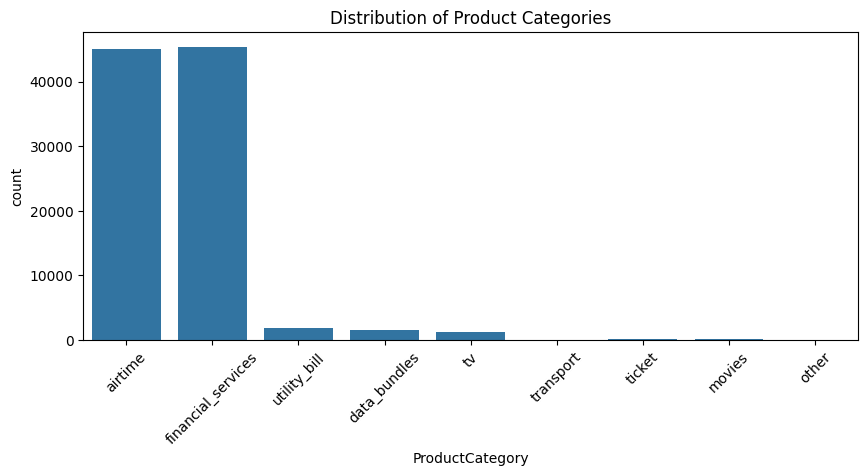

In [60]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='ProductCategory')
plt.xticks(rotation=45)
plt.title('Distribution of Product Categories')

### Step 5: Explore Numerical Columns

array([[<Axes: title={'center': 'CountryCode'}>,
        <Axes: title={'center': 'Amount'}>],
       [<Axes: title={'center': 'Value'}>,
        <Axes: title={'center': 'PricingStrategy'}>],
       [<Axes: title={'center': 'FraudResult'}>, <Axes: >]], dtype=object)

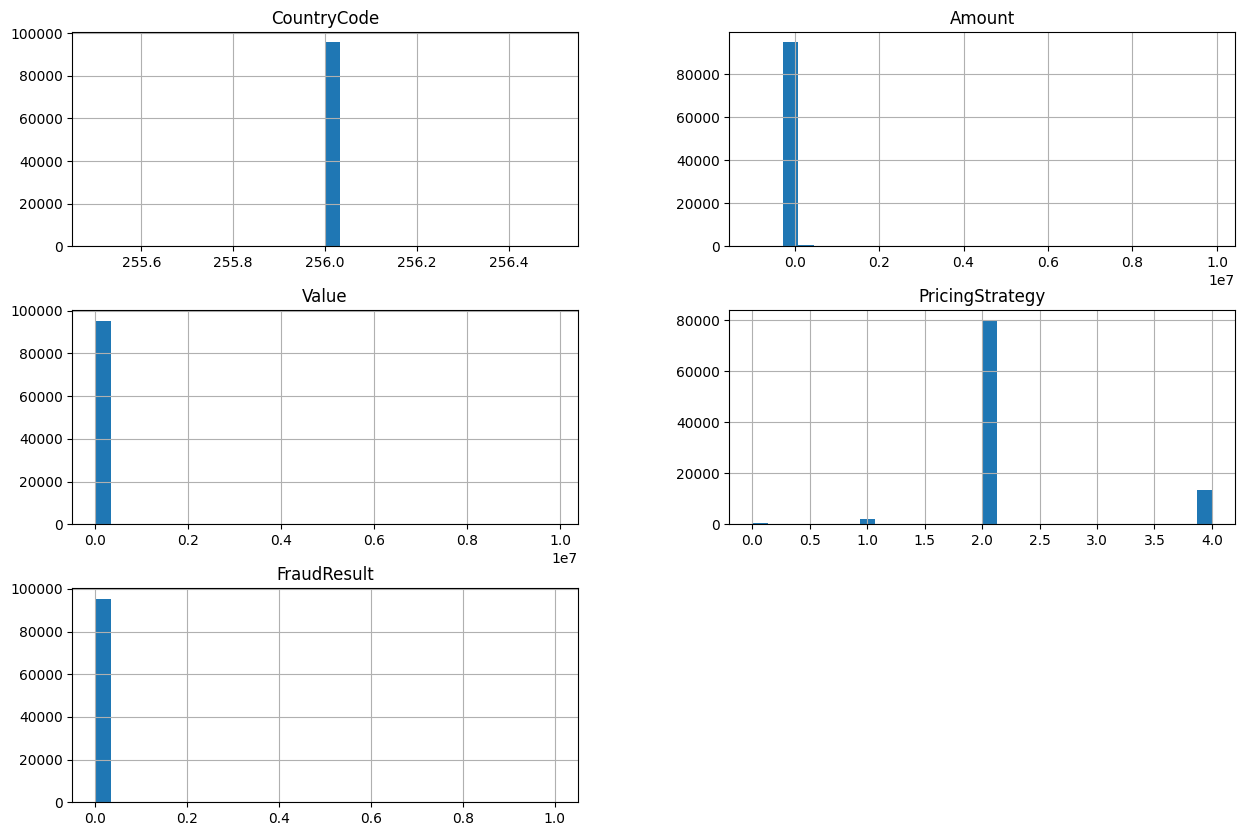

In [61]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(figsize=(15, 10), bins=30)

### Step 6: Analyze Date & Time Features

In [62]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract datetime features
df['Year'] = df['TransactionStartTime'].dt.year
df['Month'] = df['TransactionStartTime'].dt.month
df['DayOfWeek'] = df['TransactionStartTime'].dt.dayofweek
df['Hour'] = df['TransactionStartTime'].dt.hour

Text(0.5, 1.0, 'Transaction Volume by Hour of Day')

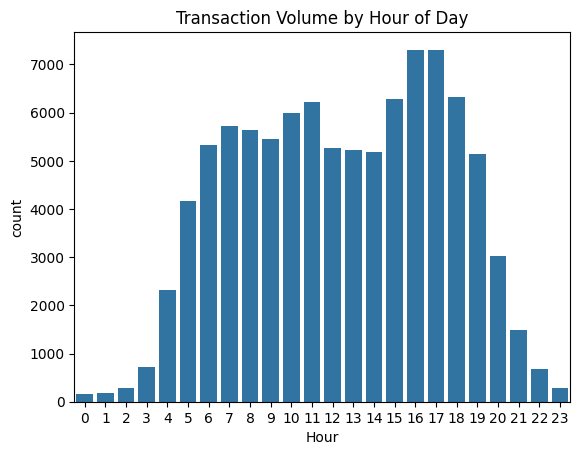

In [63]:
sns.countplot(x='Hour', data=df)
plt.title('Transaction Volume by Hour of Day')

### Step 7: Fraud Analysis

<Axes: xlabel='FraudResult', ylabel='count'>

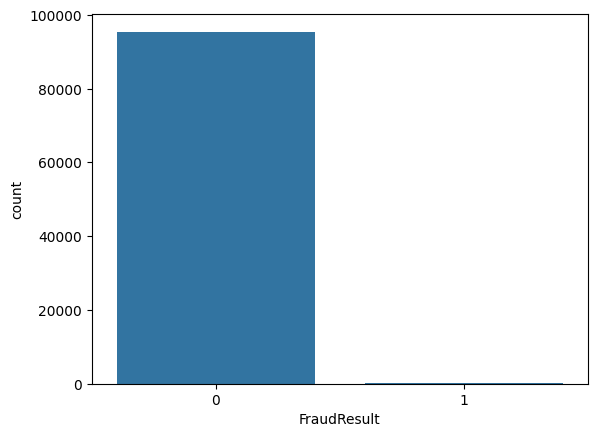

In [64]:
df['FraudResult'].value_counts()
sns.countplot(data=df, x='FraudResult')

### Step 8: Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

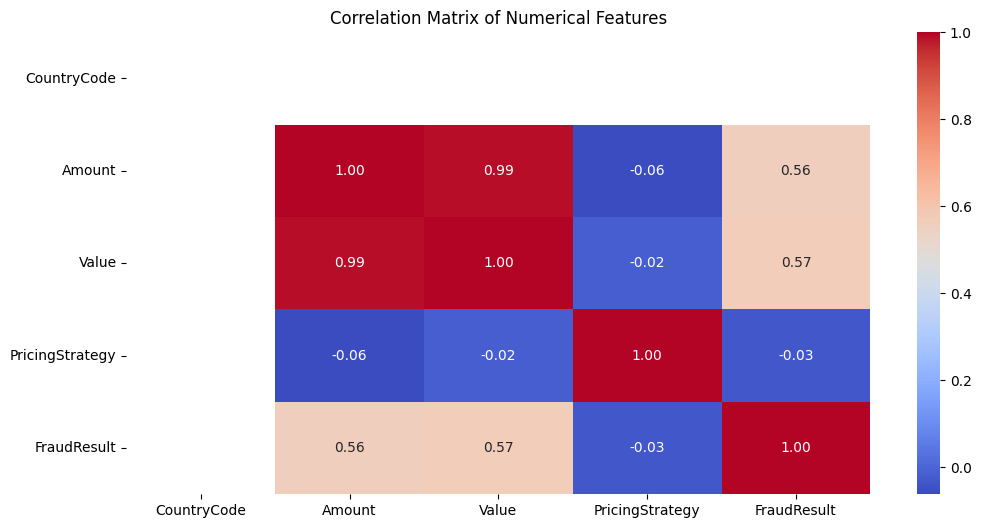

In [65]:
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")

### Key EDA Insights:

1. 'Amount' & 'Value' are Highly Correlated, that needs to be remove one column 
2. Most transactions fall within the 0–2000 range in 'Value'.
3. Some users make very frequent transactions — Frequency could be a great RFM metric.
4. Product categories and ChannelId are highly imbalanced; most customers use Android and buy from a few categories.
5. Many transactions happen during business hours, peaking at around 12 PM.
6. 'Value' is skewed — might need log transformation before modeling.


## Task 3 – Feature Engineering

In [66]:

class RFMFeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, snapshot_date):
        self.snapshot_date = snapshot_date

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

        rfm = df.groupby('CustomerId').agg({
            'TransactionStartTime': lambda x: (self.snapshot_date - x.max()).days,
            'TransactionId': 'count',
            'Value': 'sum'
        }).reset_index()

        rfm.columns = ['CustomerId', 'Recency', 'Frequency', 'Monetary']
        return rfm


def build_pipeline(snapshot_date):
    num_features = ['Recency', 'Frequency', 'Monetary']
    
    pipeline = Pipeline(steps=[
        ('rfm_engineer', RFMFeatureEngineer(snapshot_date=snapshot_date)),
        ('scaler', StandardScaler())
    ])
    return pipeline


## Task 4 – Proxy Target Variable Engineering

In [67]:
from sklearn.cluster import KMeans

def assign_high_risk_label(rfm_df, random_state=42):
    from sklearn.preprocessing import StandardScaler

    features = rfm_df[['Recency', 'Frequency', 'Monetary']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)

    kmeans = KMeans(n_clusters=3, random_state=random_state)
    rfm_df['Cluster'] = kmeans.fit_predict(X_scaled)

    # Label the cluster with the lowest engagement as high risk
    high_risk_cluster = rfm_df.groupby('Cluster')['Monetary'].mean().idxmin()
    rfm_df['is_high_risk'] = (rfm_df['Cluster'] == high_risk_cluster).astype(int)
    
    return rfm_df

## Task 5 – Model Training and Tracking

In [ ]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score
from data_processing import build_pipeline, assign_high_risk_label

# Load and prepare data
df = pd.read_csv('data/raw/xente_data.csv')
snapshot_date = pd.to_datetime(df['TransactionStartTime']).max() + pd.Timedelta(days=1)

# Pipeline: Build RFM and scale
rfm_df = build_pipeline(snapshot_date=snapshot_date).fit_transform(df)
rfm_df = pd.DataFrame(rfm_df, columns=['Recency', 'Frequency', 'Monetary'])
rfm_df['CustomerId'] = df['CustomerId'].unique()[:rfm_df.shape[0]]

# Add target
target_df = assign_high_risk_label(rfm_df)
X = target_df[['Recency', 'Frequency', 'Monetary']]
y = target_df['is_high_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# MLflow tracking
mlflow.set_experiment("credit-risk-model")

with mlflow.start_run():
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    roc = roc_auc_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    mlflow.log_metric("roc_auc", roc)
    mlflow.log_metric("f1_score", f1)

    mlflow.sklearn.log_model(model, "model")
    mlflow.end_run()


In [44]:
import sys
import os

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

print(src_path)  # Optional: check the path added

c:\Users\src


In [48]:
import sys
import os
src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

In [ ]:
from src.data_processing import assign_high_risk_label
import pandas as pd

def test_assign_high_risk_label():
    dummy_data = pd.DataFrame({
        'CustomerId': [1, 2, 3],
        'Recency': [5, 10, 100],
        'Frequency': [50, 20, 1],
        'Monetary': [1000, 500, 10]
    })
    result = assign_high_risk_label(dummy_data)
    assert 'is_high_risk' in result.columns
    assert result['is_high_risk'].isin([0, 1]).all()

## Task 6 – Model Deployment and CI/CD

In [54]:
from pydantic import BaseModel

class CustomerInput(BaseModel):
    Recency: float
    Frequency: float
    Monetary: float

In [ ]:
from fastapi import FastAPI
from src.api.pydantic_models import CustomerInput
import mlflow.pyfunc
import pandas as pd

app = FastAPI()
model = mlflow.pyfunc.load_model("models:/credit-risk-model/Production")

@app.post("/predict")
def predict_risk(customer: CustomerInput):
    df = pd.DataFrame([customer.dict()])
    prediction = model.predict(df)
    return {"risk_probability": float(prediction[0])}